In [1]:
%matplotlib inline

In [2]:
import os
import os.path
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
from time import sleep

In [3]:
start = "2016-03-06" # first Sunday after meme is releaseed
end = "2018-03-23"

## Data Loading

In [4]:
base_df = pd.read_csv("data/it_is_wednesday_my_dude.csv")

## Data Munging

In [5]:
def label_day(row):
    """Convert a python int day of week representation to a str representation
    
    :param series row: a single series (row) of a DataFrame
    """
        
    dt = pd.to_datetime(row.Day)
    day_of_week = dt.weekday()
    
    # The following usage of invisible_separator and "\u2063" is a hack I came up with to 
    # ensure that the days of the week are sorted like Monday - Sunday
    # I apologize if you've read this code but its the best I could do at the time.
    invisible_separator = "\u2063"
    
    if day_of_week == 0:
        return (invisible_separator * day_of_week) + "Monday"
    if day_of_week == 1:
        return (invisible_separator * day_of_week) + "Tuesday"
    if day_of_week == 2:
        return (invisible_separator * day_of_week) + "Wednesday"
    if day_of_week == 3:
        return (invisible_separator * day_of_week) + "Thursday"
    if day_of_week == 4:
        return (invisible_separator * day_of_week) + "Friday"
    if day_of_week == 5:
        return (invisible_separator * day_of_week) + "Saturday"
    if day_of_week == 6:
        return (invisible_separator * day_of_week) + "Sunday"
    return "Other"

In [6]:
def label_day_int(row):
    """Convert a python int day of week representation to a str representation. 0 = monday
    
    :param series row: a single series (row) of a DataFrame
    """
        
    dt = pd.to_datetime(row.Day)
    day_of_week = dt.weekday()
    
    return day_of_week

In [7]:
def add_day_of_week(df):
    """Given a DataFrame, with a column called Day where Day is in 'YYYY-MM-DD' format, add a new column for the day of the week and a new column for its int representation for ease of sorting
    
    :param DataFrame df: the data frame that we'll add the day to
    
    :return: a DataFrame with the day of the week and int represenation added
    :rtype: DataFrame
    """
    
    df["day_of_week"] = df.apply(lambda row: label_day (row),axis=1)
    df["day_of_week_int"] = df.apply(lambda row: label_day_int (row),axis=1)

    return df

In [8]:
def add_year(df):
    """Given a DataFrame, with a column called Day where Day is 'YYYY-MM-DD' format, add a new column for the current year
    
    :param DataFrame df: the data frame that we'll add the year to
    
    :return: a DataFrame with the year added
    :rtype: DataFrame
    """
    
    # df["year"] = df["Day"].values[0].split('-')[0]
    f = lambda x: x["Day"].split('-')[0]
    df["Year"] = df.apply(f, axis=1)
    return df

In [9]:
# Adding day of week and year for ease of graphing
df_with_day = add_day_of_week(base_df)
df_with_day_and_year = add_year(df_with_day)
df = df_with_day_and_year

In [10]:
# Renaming columns for ease of use
df.rename(columns={"Day": "date", "it is Wednesday my dudes: (Worldwide)": "search_index", "Year": "year"}, inplace=True)

## Data Visualization

### Box-and-Whisker Graphs

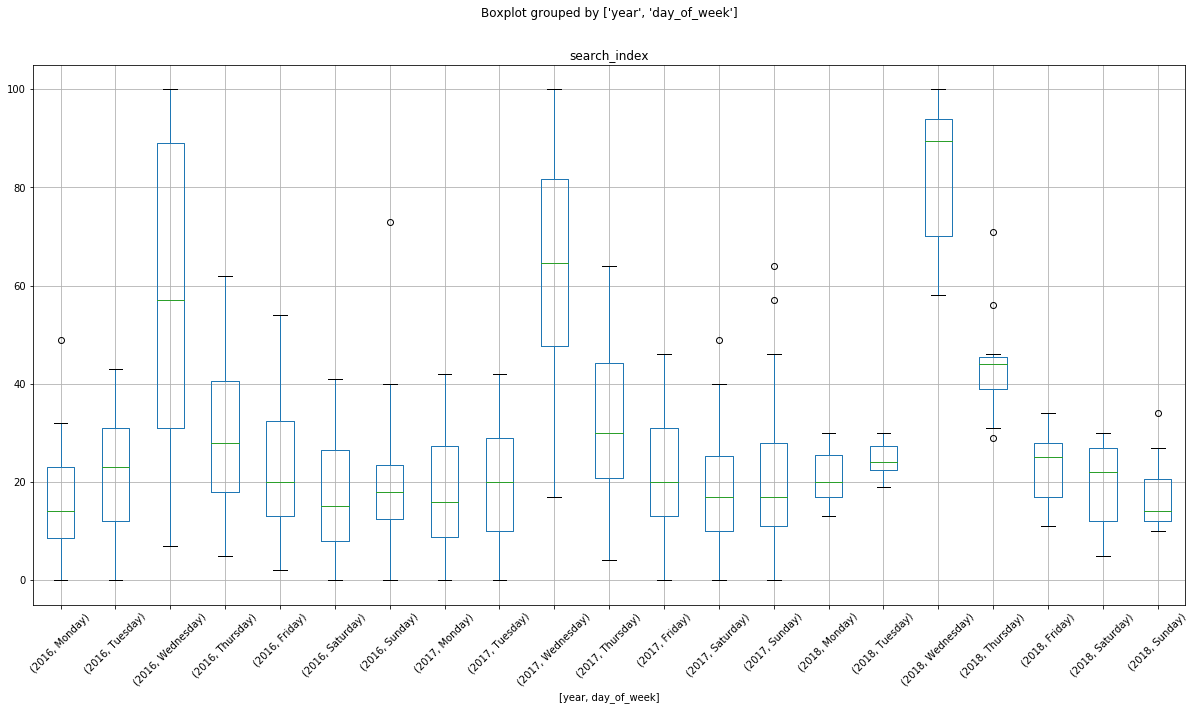

In [11]:
sorted_df = df.sort_values(by=["day_of_week_int"])

fig = sorted_df.boxplot(column="search_index", by=["year", "day_of_week"], rot=45, figsize=(20,10))
fig.figure.savefig("output.png")

### Line Graphs

The following line graphs were a work in progress and did not pose to show much, as I was unable to indicate the Wednesdays using some visualization and therefore is difficult to use.

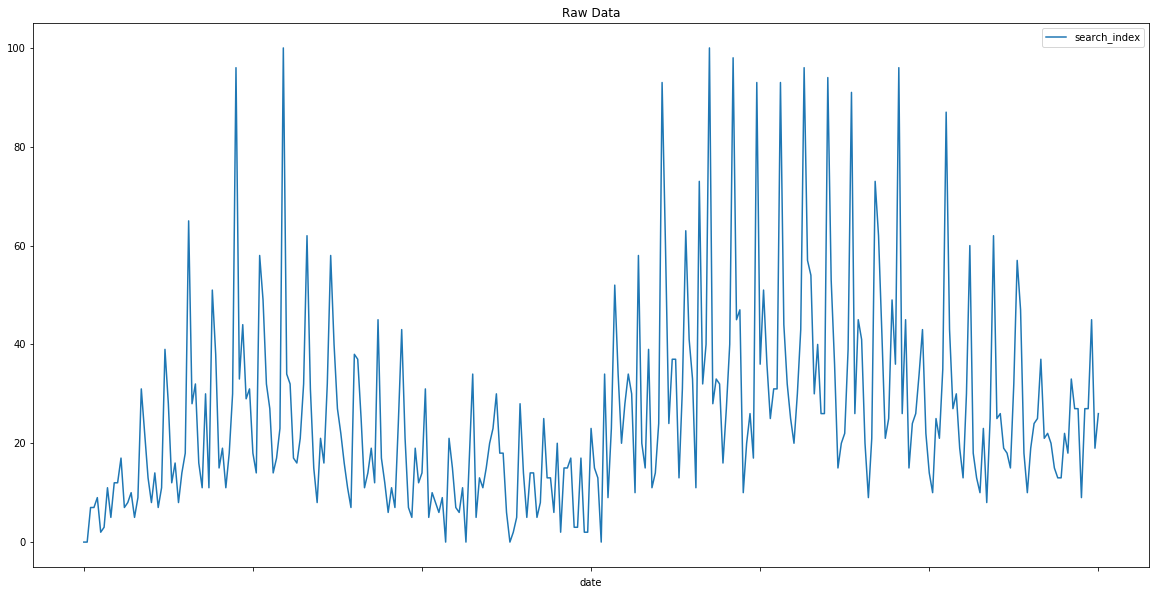

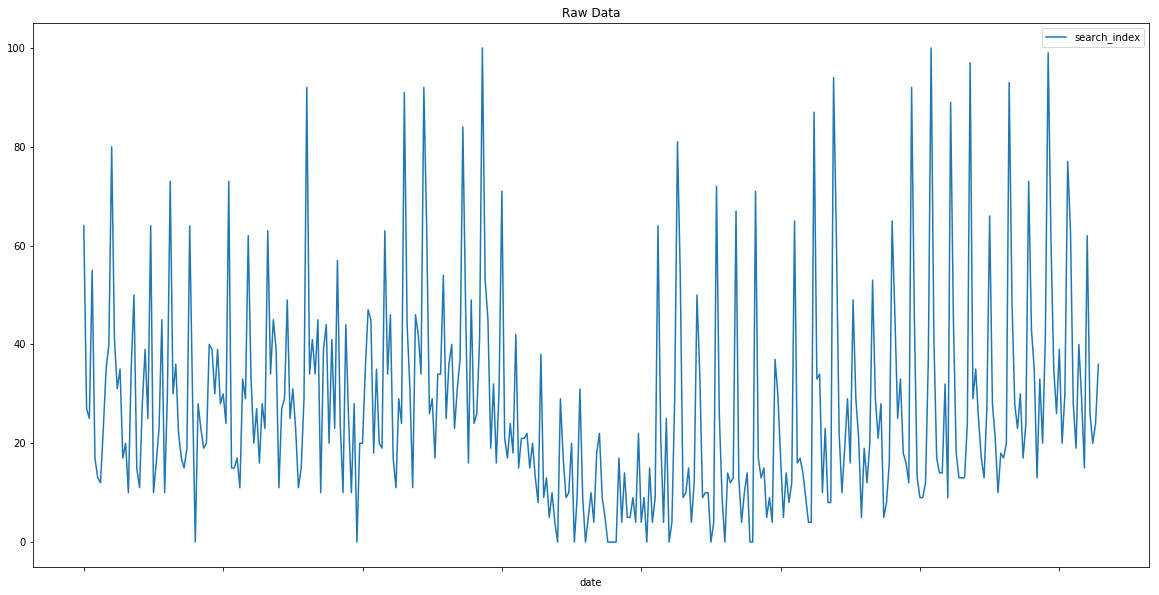

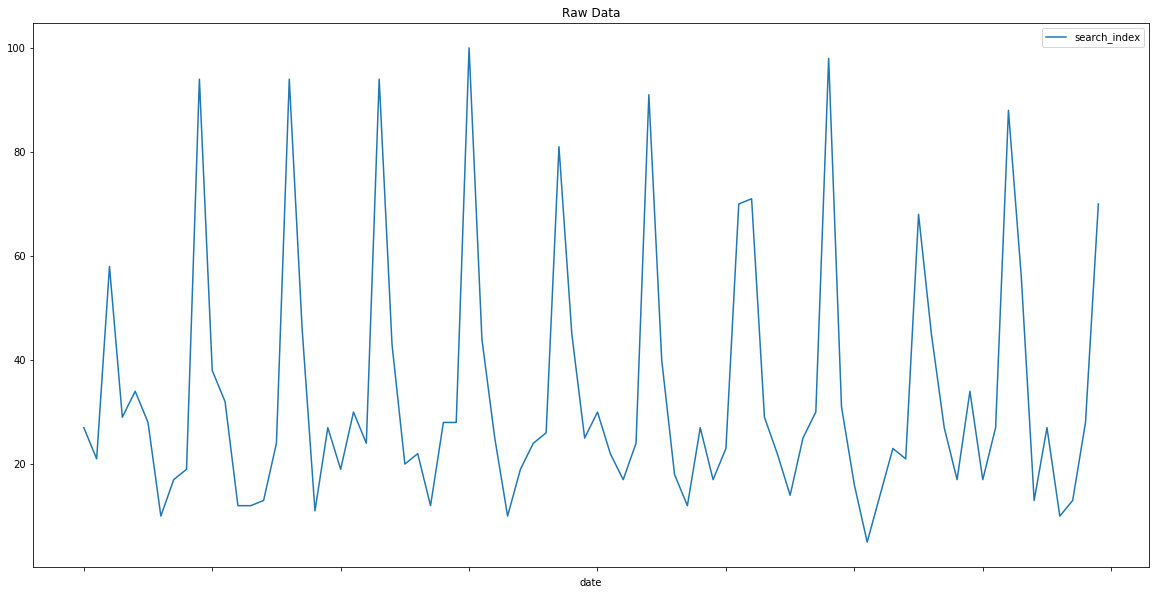

In [12]:
fig = df.groupby("year").plot(x="date", y="search_index", figsize=(20,10), title="Raw Data")
# fig.figure.savefig("output.png")

The following is my attempt at filtering the data to see if the Line graph approves. There are many other ways to provide filters of time series data, but I just quickly winged it and subtracted the mean to see if things improved. They did not.

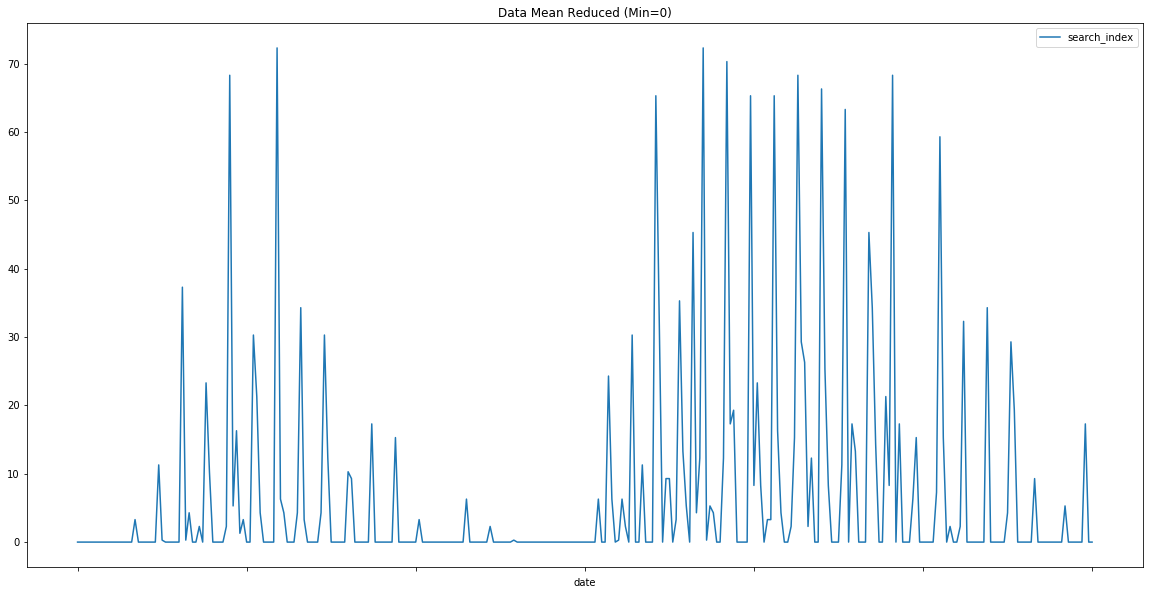

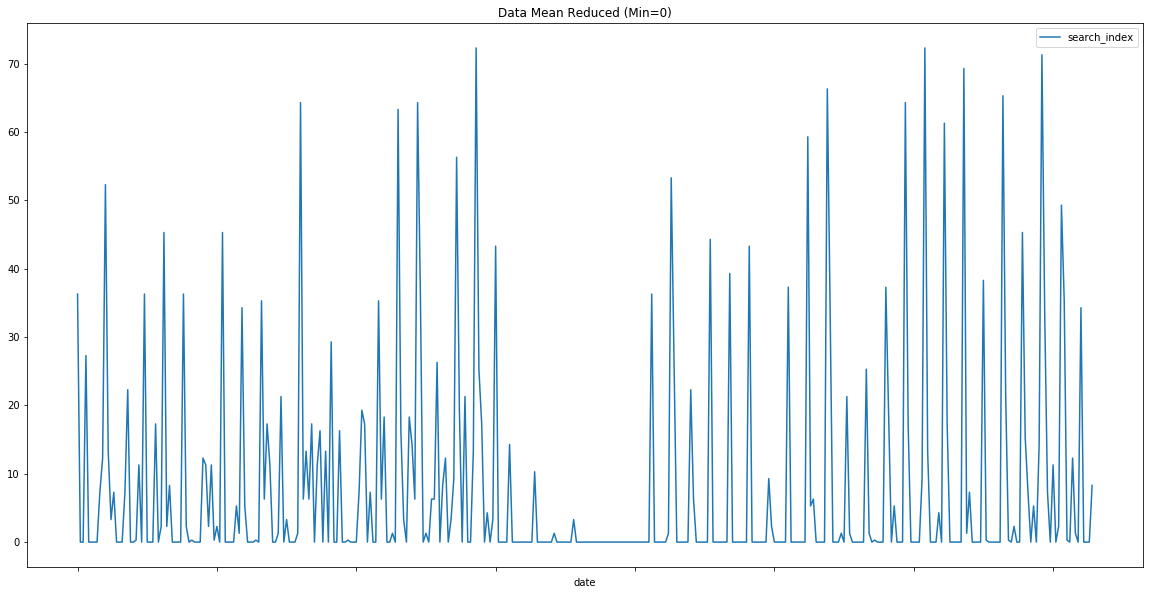

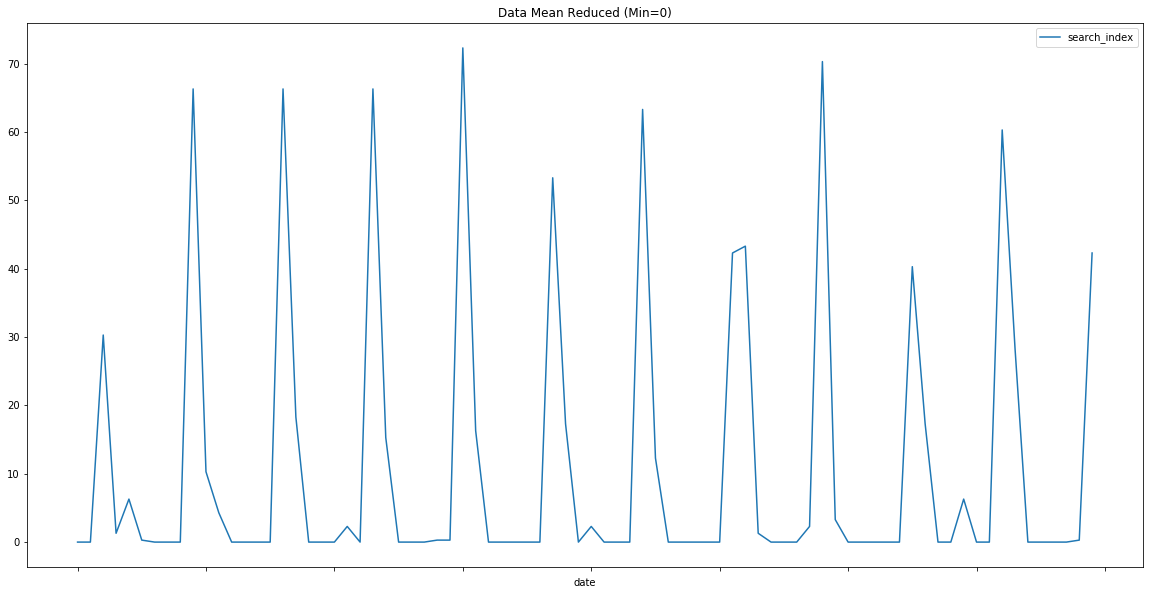

In [13]:
offset_df = df
offset_df["search_index"] = offset_df["search_index"] - offset_df["search_index"].mean()
offset_df["search_index"] = offset_df["search_index"].apply(lambda x: 0 if x < 0 else x)

fig = offset_df.groupby("year").plot(x="date", y="search_index", figsize=(20,10), title="Data Mean Reduced (Min=0)")
# fig.figure.savefig("output.png")

The following are aboninations of grapgs but I left them here as I might be able to use them in the future, on this project, when my visualization skills improve.